In [110]:
import scanpy as sc
import pandas as pd
import pandas as pd
from matplotlib import rcParams
from matplotlib import style
import matplotlib.pyplot as plt
import scirpy as ir
import anndata
sc.settings.verbosity = 3

plt.rcParams['figure.facecolor'] = 'white'
plt.rcParams['figure.figsize'] = 14,10
pd.set_option('display.max_columns', None) 
import anndata2ri


R[write to console]: 

/home/matthew/.local/lib/python3.6/site-packages/rpy2/robjects/pandas2ri.py:15: FutureWarning: pandas.core.index is deprecated and will be removed in a future version.  The public classes are available in the top-level namespace.
  from pandas.core.index import Index as PandasIndex


In [111]:


# Activate the anndata2ri conversion between SingleCellExperiment and AnnData
anndata2ri.activate()

#Loading the rpy2 extension enables cell magic to be used
#This runs R code in jupyter notebook cells
%load_ext rpy2.ipython


In [113]:
%%R
suppressPackageStartupMessages(library(Seurat))

obj <-readRDS('/home/matthew/Research/HL_PD1/tcell.rds')
obj

An object of class Seurat 
34080 features across 10601 samples within 3 assays 
Active assay: RNA (16420 features, 0 variable features)
 2 other assays present: SCT, integrated
 2 dimensional reductions calculated: pca, umap


In [148]:
%%R -o pbmc
#convert the Seurat object to a SingleCellExperiment object
pbmc <- as.SingleCellExperiment(obj)

pbmc

class: SingleCellExperiment 
dim: 16420 10601 
metadata(0):
assays(2): X logcounts
rownames(16420): RP11-34P13.7 FO538757.3 ... NEU4 KCTD14
rowData names(0):
colnames(10601): Timepoint_1_AAACCTGAGAGAGCTC-1
  Timepoint_1_AAACCTGGTGTTTGGT-1 ... Timepoint_6_TTTGTCACAATTGCTG-1
  Timepoint_6_TTTGTCACACATGGGA-1
colData names(27): orig.ident nCount_RNA ... PI3K_AKT_MTOR1 ident
reducedDimNames(2): PCA UMAP
altExpNames(0):


In [157]:
# pbmc.write('pbmc.h5ad')
pbmc = sc.read_h5ad('pbmc.h5ad')
pbmc

AnnData object with n_obs × n_vars = 10601 × 16420
    obs: 'orig.ident', 'nCount_RNA', 'nFeature_RNA', 'Timepoint', 'Disease_status', 'Pembrolizumab', 'iRAE', 'log10GenesPerUMI', 'percent_mito', 'percent_ribo', 'percent_hb', 'S.Score', 'G2M.Score', 'Phase', 'nCount_SCT', 'nFeature_SCT', 'integrated_snn_res.0.8', 'seurat_clusters', 'new.ident', 'integrated_snn_res.1', 'clonotype', 'tcell_barcode', 'OXIDATIVE_PHOSPHORYLATION1', 'GLYCOLYSIS1', 'MTOR1', 'PI3K_AKT_MTOR1', 'ident'
    obsm: 'X_pca', 'X_umap'
    layers: 'logcounts'

In [158]:
pbmc.layers['untouched'] = pbmc.X
pbmc.X = pbmc.layers['logcounts']


In [ ]:
sc.pl.umap(pbmc,color='new.ident')

In [89]:
# plot for each timepoint
t1 = adata[adata.obs['Timepoint'].isin(['1'])]
t2 = adata[adata.obs['Timepoint'].isin(['2'])]
t3 = adata[adata.obs['Timepoint'].isin(['3'])]
t4 = adata[adata.obs['Timepoint'].isin(['4'])]
t5 = adata[adata.obs['Timepoint'].isin(['5'])]
t6 = adata[adata.obs['Timepoint'].isin(['6'])]



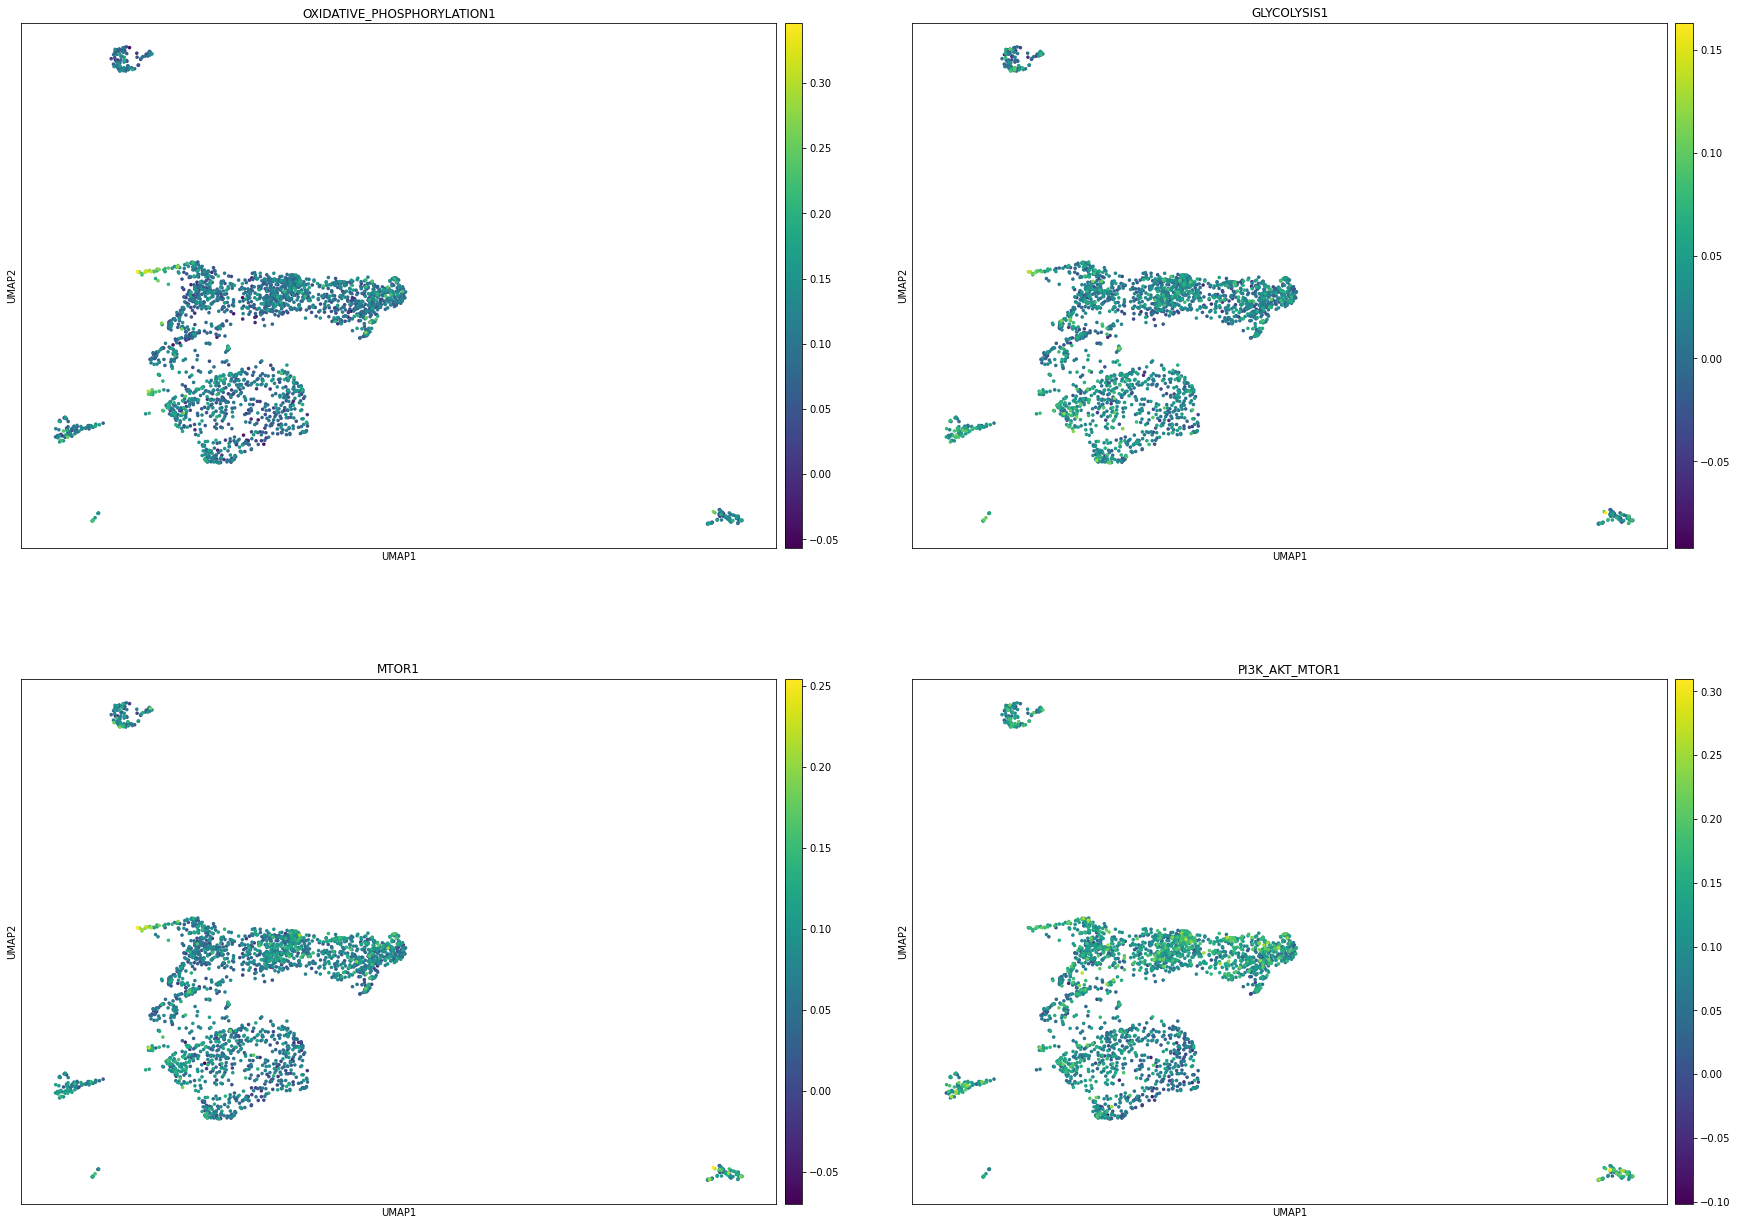

In [118]:
sc.pl.umap(t4, color=['OXIDATIVE_PHOSPHORYLATION1','GLYCOLYSIS1','MTOR1','PI3K_AKT_MTOR1'],ncols=2)

In [146]:
pbmc.layers['logcounts']

<10601x16420 sparse matrix of type '<class 'numpy.float64'>'
	with 13323564 stored elements in Compressed Sparse Row format>

categories: CD4 TH2, CD8 TEM-1, CD8 TEM-2, etc.
var_group_labels: Cytotoxic, Active, Naive, etc.


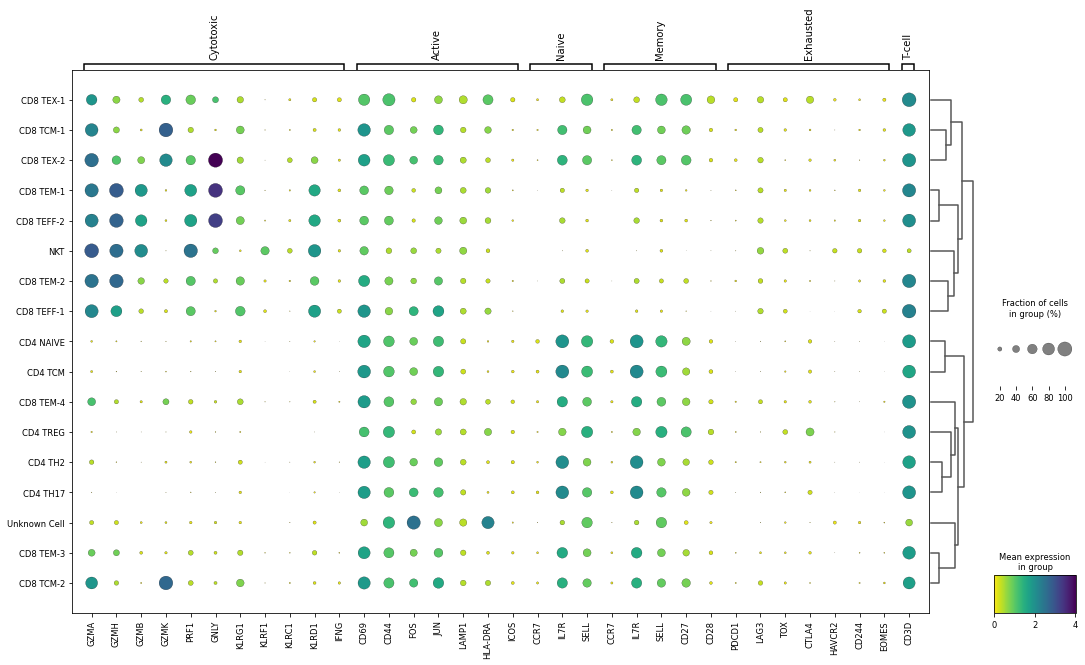

/home/matthew/.local/lib/python3.6/site-packages/anndata/_core/anndata.py:1192: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  if is_string_dtype(df[key]) and not is_categorical(df[key])
categories: CD4 TH2, CD8 TEM-1, CD8 TEM-2, etc.
var_group_labels: Cytotoxic, Active, Naive, etc.


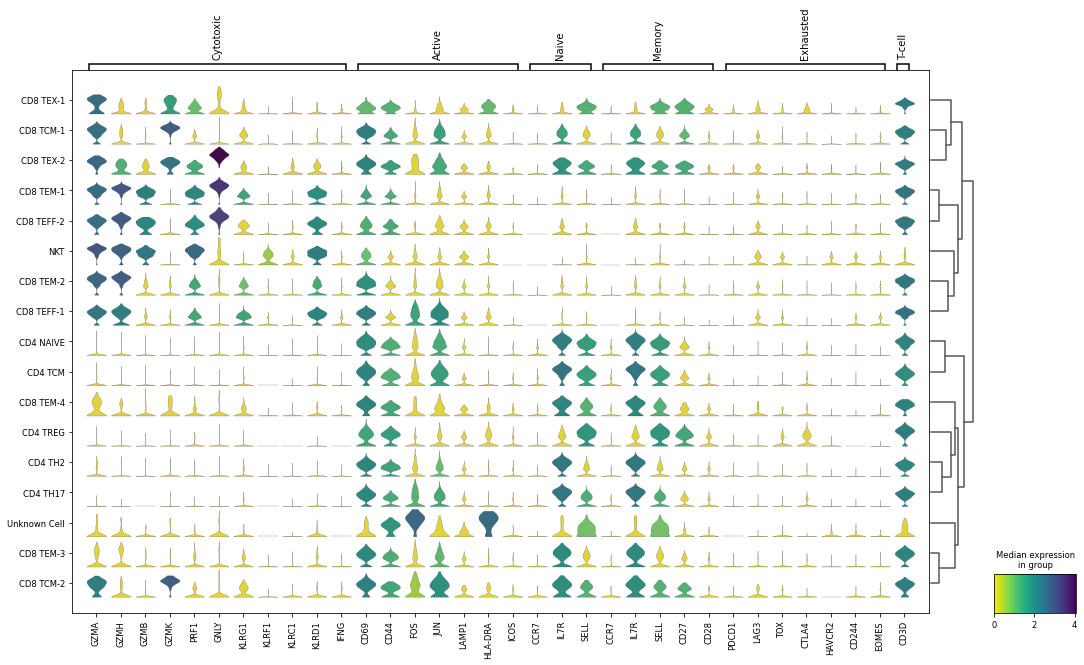

/home/matthew/.local/lib/python3.6/site-packages/anndata/_core/anndata.py:1192: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  if is_string_dtype(df[key]) and not is_categorical(df[key])
categories: CD4 TH2, CD8 TEM-1, CD8 TEM-2, etc.
var_group_labels: Cytotoxic, Active, Naive, etc.


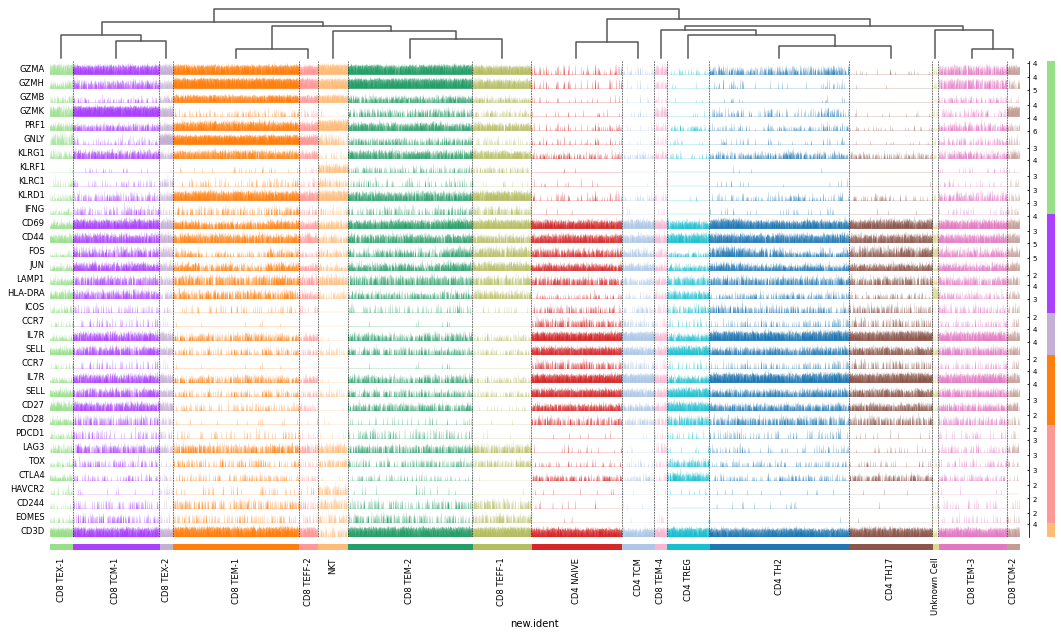

In [162]:







marker_genes_dict = {
    'Cytotoxic': ["GZMA","GZMH","GZMB","GZMK","PRF1","GNLY","KLRG1","KLRF1","KLRC1","KLRD1","IFNG"],
    'Active': ["CD69",'CD44',"FOS","JUN","LAMP1","HLA-DRA","ICOS"],
    'Naive': ['CCR7','IL7R','SELL'],
    'Memory': ['CCR7','IL7R','SELL','CD27','CD28'],
    'Exhausted': ['PDCD1','LAG3','TOX','CTLA4','HAVCR2','CD244','EOMES'],
    'T-cell': ['CD3D'],
}



sc.pl.dotplot(pbmc, marker_genes_dict, 'new.ident', dendrogram=True,cmap='viridis_r',figsize=(18,10),save='dotplot.png')
ax = sc.pl.stacked_violin(pbmc, marker_genes_dict, groupby='new.ident', swap_axes=False, dendrogram=True,cmap='viridis_r',figsize=(18,10),save='stacked.png')
ax = sc.pl.tracksplot(pbmc, marker_genes_dict, groupby='new.ident', dendrogram=True,figsize=(18,10),cmap='viridis_r',save='track.png')




/home/matthew/.local/lib/python3.6/site-packages/anndata/_core/anndata.py:1192: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  if is_string_dtype(df[key]) and not is_categorical(df[key])


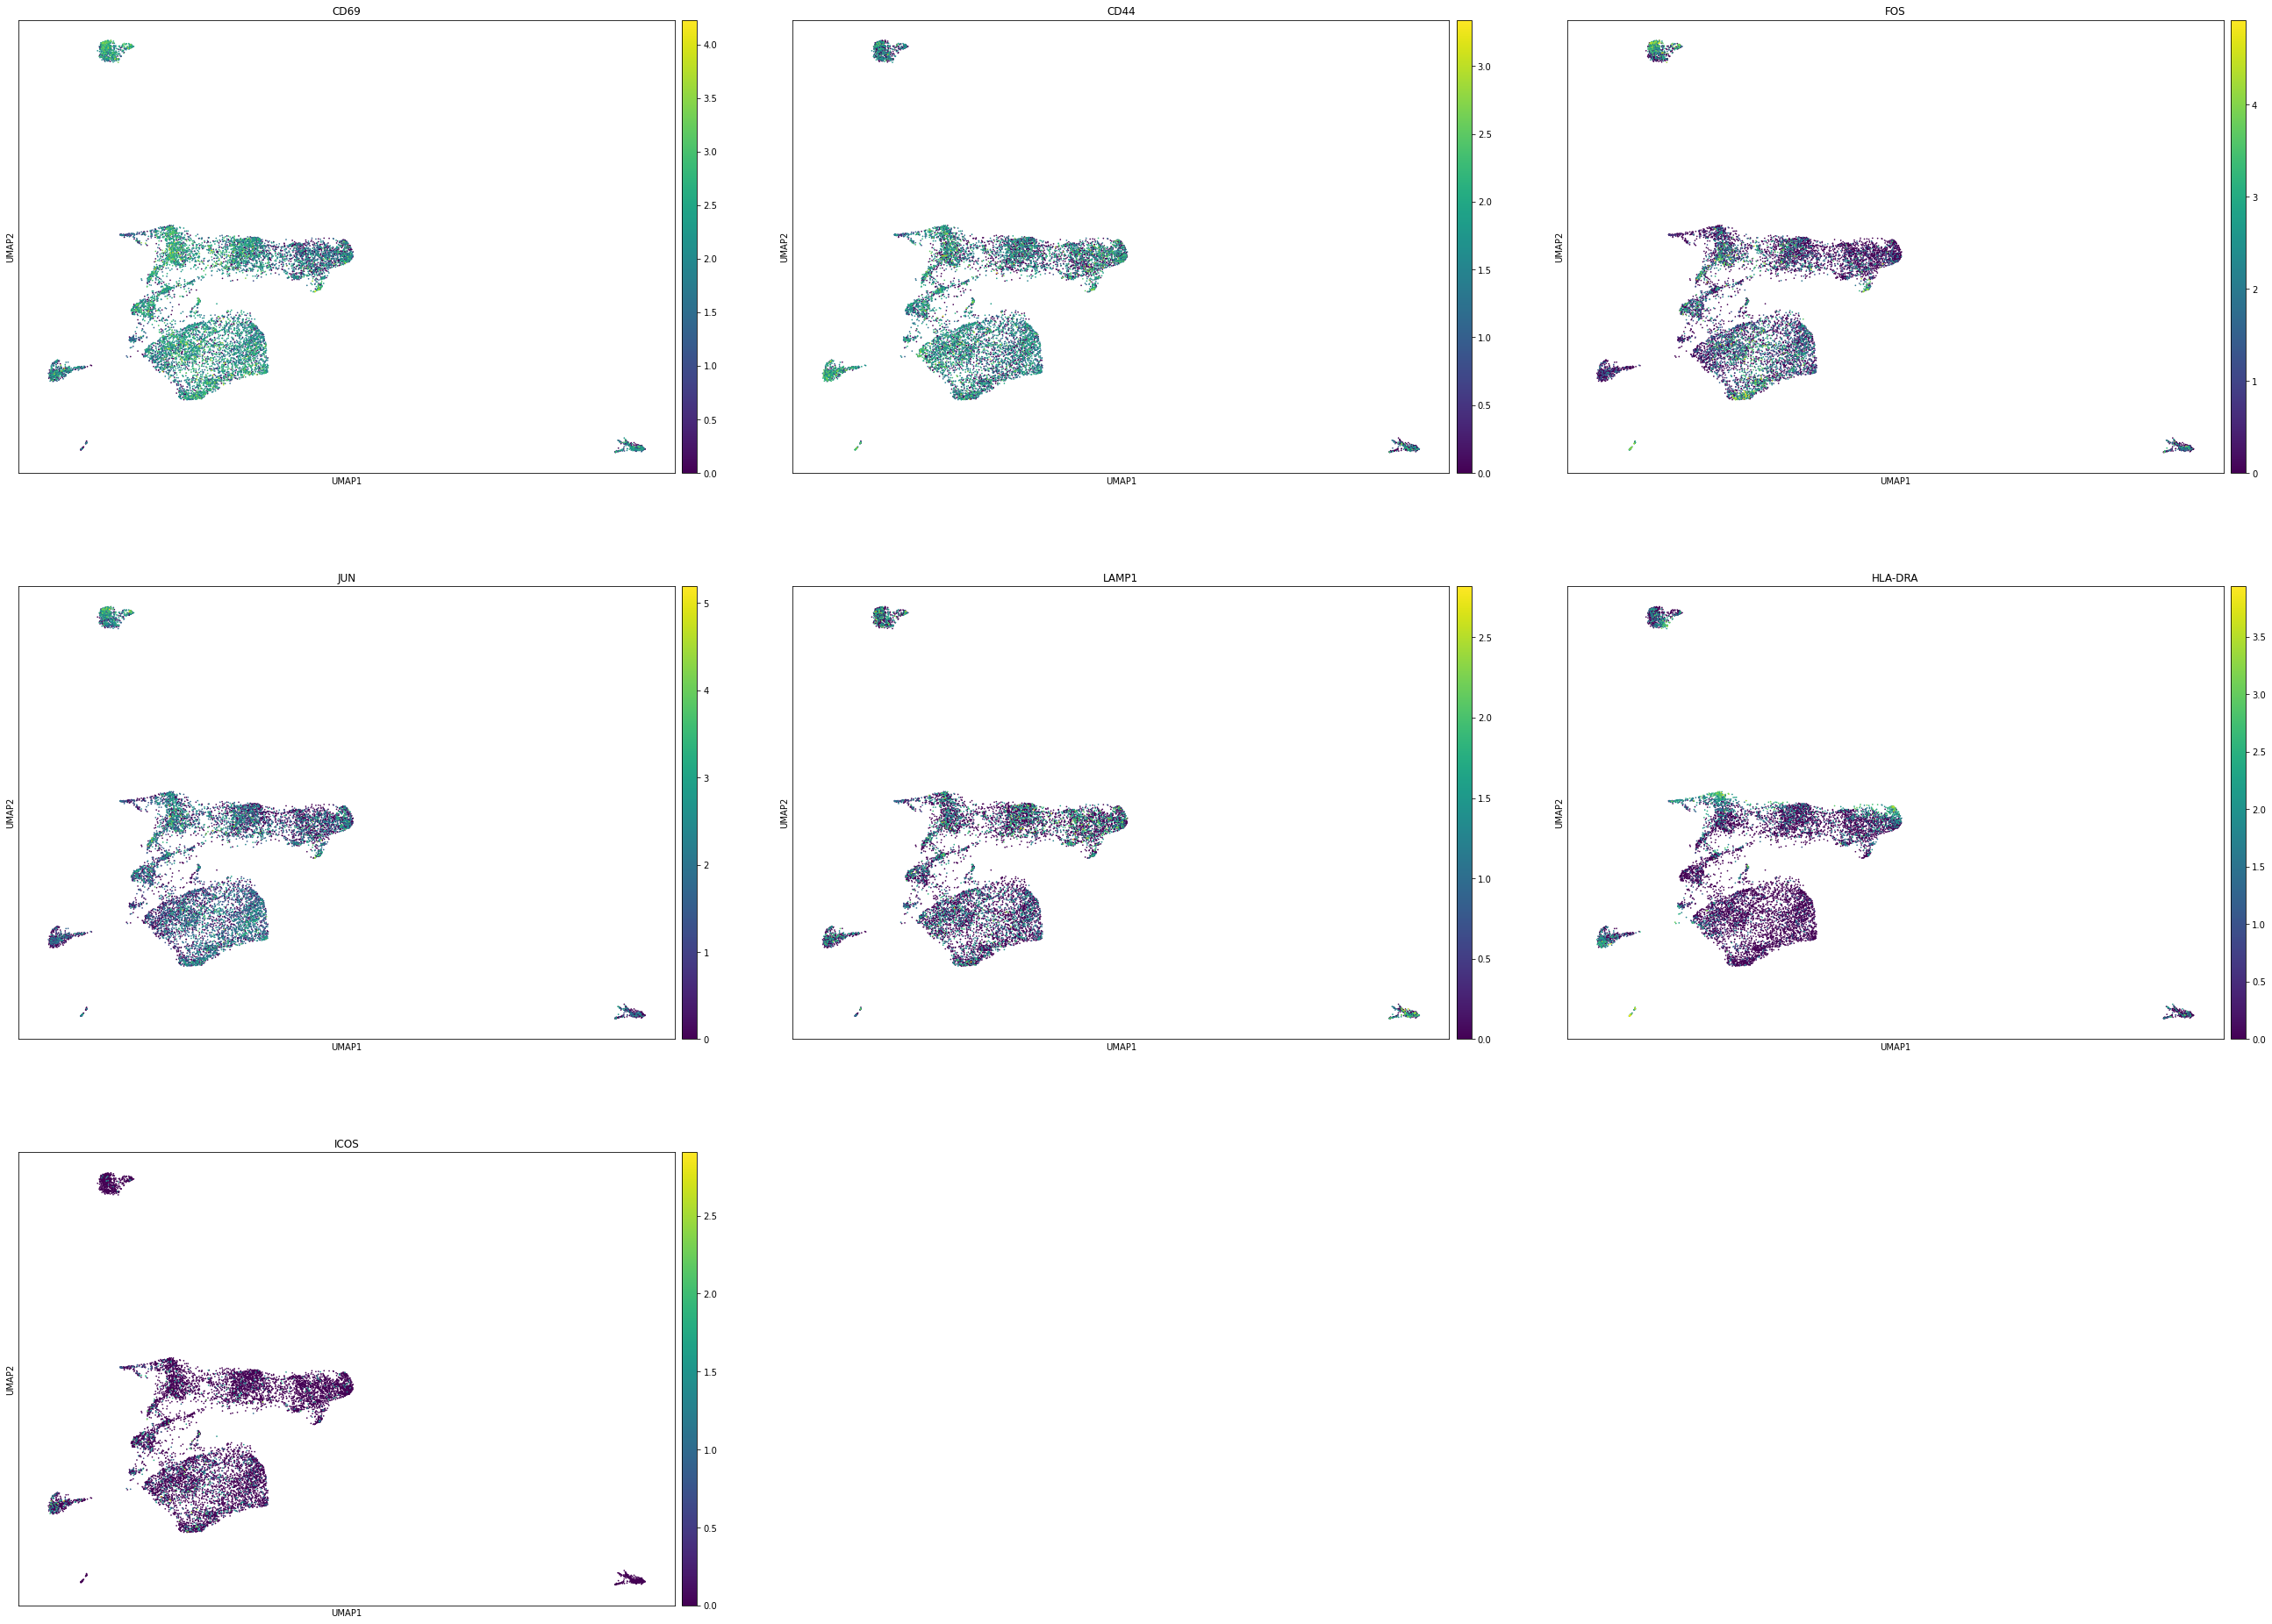

In [160]:
sc.pl.umap(pbmc, color=["CD69",'CD44',"FOS","JUN","LAMP1","HLA-DRA","ICOS"],ncols=3)